# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 2nd, 23:00 h** 

In [92]:
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')

In [93]:
def normalize(image): return (image[:,:]- image.min())/(image.max() - image.min())

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

**FirstPart: Template Matching and Image Descriptors**

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

**Second Part: Image matching**

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

**1.1** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

In [94]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()

Create a function for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

1.0 0.0
1.0 0.0


<ipython-input-95-1c1442299aaa>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  einstein = normalize(rgb2gray(img_as_float(einstein)))
<ipython-input-95-1c1442299aaa>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  eye = normalize(rgb2gray(img_as_float(eye)))


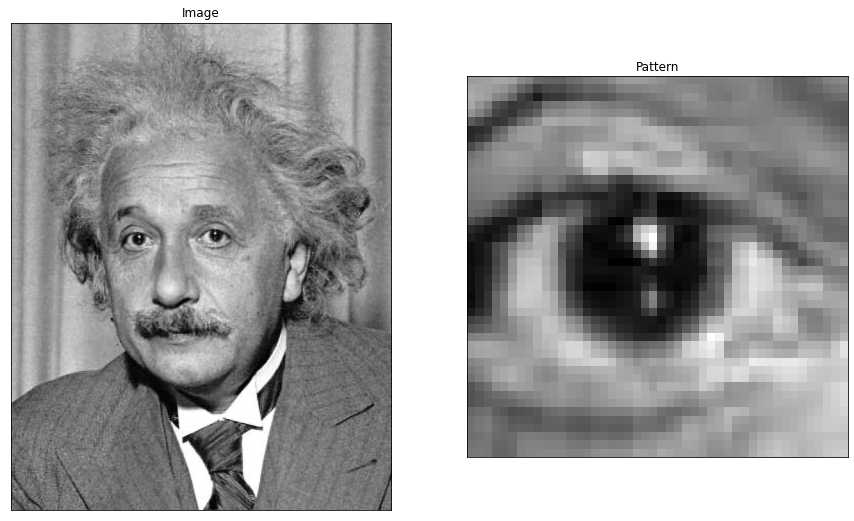

In [95]:
from skimage.color import rgb2gray
from skimage.feature import match_template
from skimage import img_as_float

einstein = io.imread('./images/einstein.png')
eye = io.imread('./images/eye.png')

einstein = normalize(rgb2gray(img_as_float(einstein)))
eye = normalize(rgb2gray(img_as_float(eye)))


print(einstein.max(), einstein.min())
print(eye.max(), eye.min())

visualize2(einstein, eye, 'Image', 'Pattern')

In [96]:
import numpy as np
from numpy import linalg

def ssd(image, pattern):
    
    pattern = normalize(pattern)
    image = normalize(image)
    
    x = image.shape[0]
    y = image.shape[1]
    i = pattern.shape[0]
    j = pattern.shape[1]
    
    result = img_as_float(np.ones((x-i,y-j)))
    
    for n in range(0,x-i):
        for m in range(0, y-j):
            aux = pattern-image[n:n+i,m:m+j]
            
            result[n,m] = np.linalg.norm(aux)
            
    return img_as_float(result)


def ssd_fast(image, pattern): 
    
    pattern = normalize(pattern)
    image = normalize(image)
    
    x = image.shape[0]
    y = image.shape[1]
    i = pattern.shape[0]
    j = pattern.shape[1]
    
    return normalize(np.array([[np.linalg.norm(np.linalg.norm(pattern-image[n:n+i,m:m+j])) for m in range(0, y-j)] for n in range(0,x-i)]))


In [97]:
#We compute einstein distances with patter using NCC
einstein_ncc = match_template(einstein, eye)

#We compute einstein distances with patter using NCC
einstein_2 = einstein.copy()
einstein_ed = ssd_fast(einstein_2, eye)

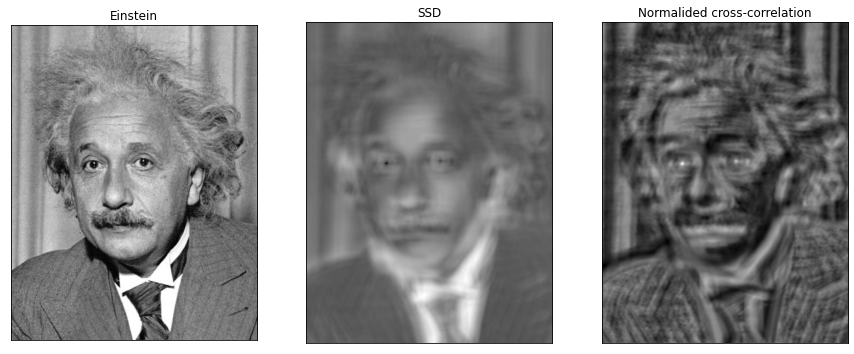

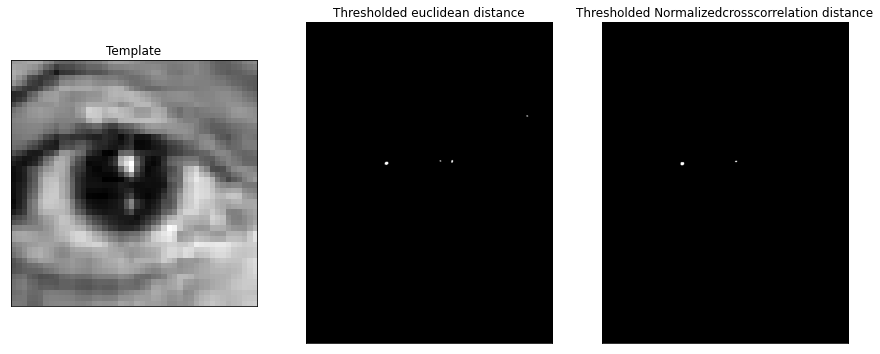

In [98]:
#thresholds

def mask_ssd(image, threshold):
    mask = np.ones(image.shape)
    mask[image > threshold] = 0
    return mask

def mask_ncc(image, threshold):
    mask = np.ones(image.shape)
    image = normalize(image)
    mask[image <= image.max() - threshold] = 0
    return mask

#Caclulate masks
einstein_ncc_mask = np.ones(einstein_ncc.shape)
einstein_ed_mask = np.ones(einstein_ed.shape)


visualize3(einstein, einstein_ed, einstein_ncc, 
           'Einstein', 'SSD', 'Normalided cross-correlation')
visualize3(eye, mask_ssd(einstein_ed, 0.296),mask_ncc(einstein_ncc, 0.296), 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

**1.2** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? 1.2 How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)?

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

Note: Use titles of the figures to explain what is displayed.


Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results on this image, using `eye.png` as template:

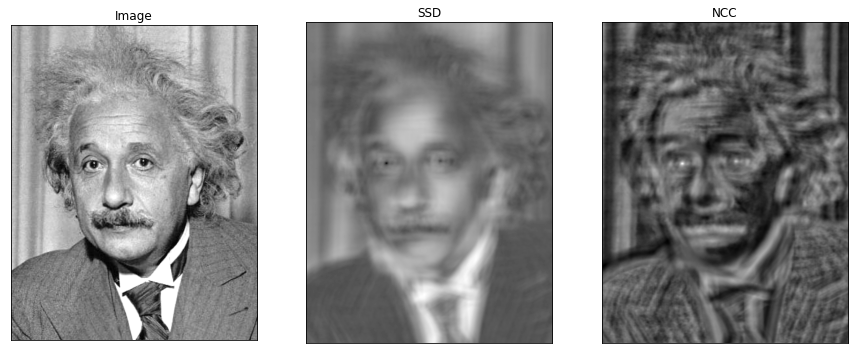

In [99]:
einstein_br = normalize(np.array(io.imread('images/einstein_br.png')))

ebr_ssd = ssd_fast(einstein_br, eye)
ebr_ncc = match_template(einstein_br, eye)

visualize3(einstein_br, ebr_ssd, ebr_ncc, 'Image', 'SSD', 'NCC')


visualize3(eye, mask_ssd(ebr_ssd, 0.296), mask_ncc(ebr_ncc, 0.296), 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [100]:
print('SSD: ', ebr_ssd.min())
print('NCC: ', ebr_ncc.max())

#those make sense because the minimum in ssd is the best match (0) and the maximum in NCC (almost 1)

SSD:  0.0
NCC:  0.9768232838639574


Read `einstein_mask.png` and display the results on this image, using the `eye.png` template:

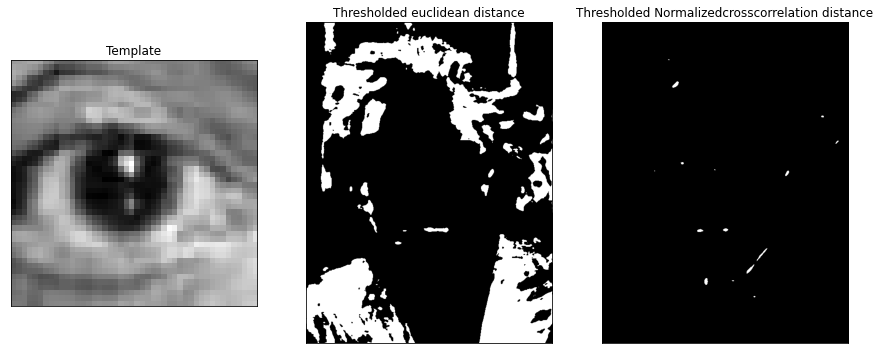

In [101]:
einstein_mask = normalize(np.array(io.imread('images/einstein_mask.png')))

emask_ssd = ssd_fast(einstein_mask, eye)
emask_ncc = match_template(einstein_mask, eye)

visualize3(einstein_mask, emask_ssd, emask_ncc, 'Image', 'SSD', 'NCC')


visualize3(eye, mask_ssd(emask_ssd, 0.1), mask_ncc(emask_ncc, 0.15), 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

Print the minimum SSD and the maximum NCC

In [102]:
print('SSD: ', emask_ssd.min())
print('NCC: ', emask_ncc.max())

SSD:  0.0
NCC:  0.6166362739337286


What are the distances between the template and the image around the eyes of the image? 

In SSD case be can see that arround eyes, the distance is very big. Comparing to the other distance images, black points are on the eyes, with the mask, the area arround the eyes is very white.

For NCC, there is a lot of unexpected small distances arround the eyes. Comparing to previous images the template matching is giving a lot of near points that are cleary not matching the template.

Comment the template matching process:
* Is the algorithms affected by contrast changes in the image?
* How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?
* What parameters it has and which measure for image comparisons works better.

Answers:
* Yes. Changing the contrast implies changing the numeric value of each pixel augmenting the standard deviation of the sum of all te pixels (ie, the whites become more white, the dark ones more darker and the middle ones tend to one or another). That directly affects the distances betbeen pixels, therefore, it affects the algorithm.

* Metrics changed a lot. For SSD we see that minumum is the same, but image is normalized. In mask image, we see that minumums in zones that before weren't even close to 0. So values changed a lot and thats the reason why we don't get a nice template mathc. For NCC we see that maximum value is smaller, so we can say that template does not match a good as before.

* It only has the threshold in the detection of the distnace, which is a good thing for certain types of images (industrial pieces, very concrete parts of images etc). Based on this experiment we think that NCC measure works better as it gives better results.

**1.3** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

In [103]:
eye = io.imread('./images/eye_br.png')

ed = ssd_fast(einstein, eye)
ncc = match_template(einstein, eye)

visualize3(einstein, ed, ncc, 'Image', 'SSD', 'NCC')

visualize3(eye, mask_ssd(ed, 0.245), mask_ncc(ncc, 0.245), 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

For NCC we must change the threshold because, as template changed, the NCC with the original image is larger.

The same happens with SSD. As we take a less restrictive threshold to mathc right eye, some other parts are computed as good matches, as we can see i the threshold eucliden distance image. 

Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.

**Help:** use the function rotate() in skimage.transform

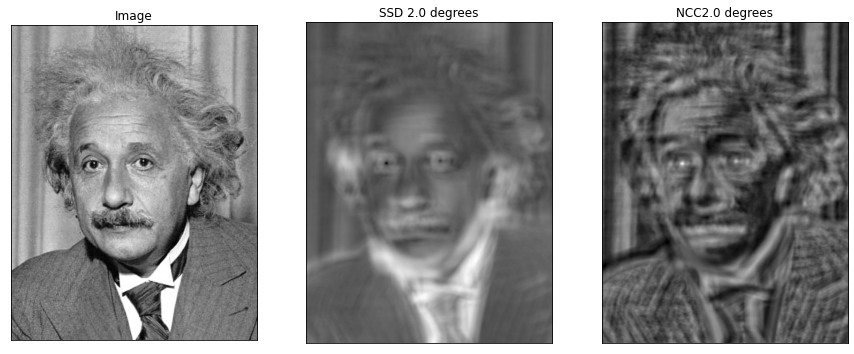

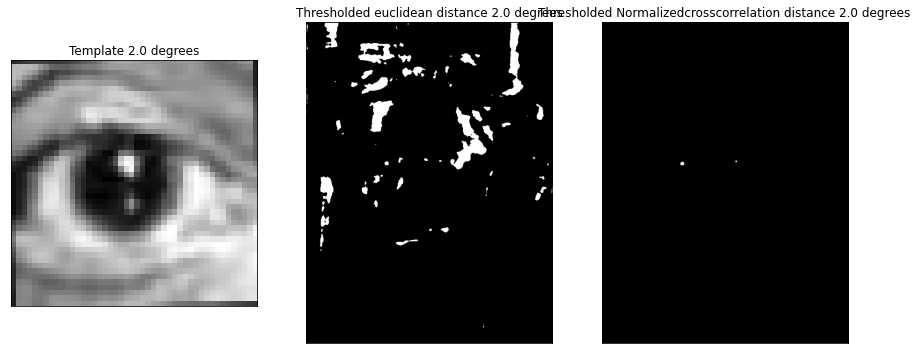

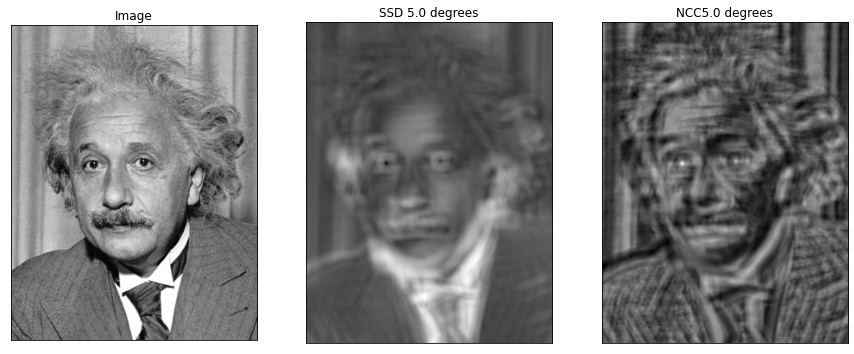

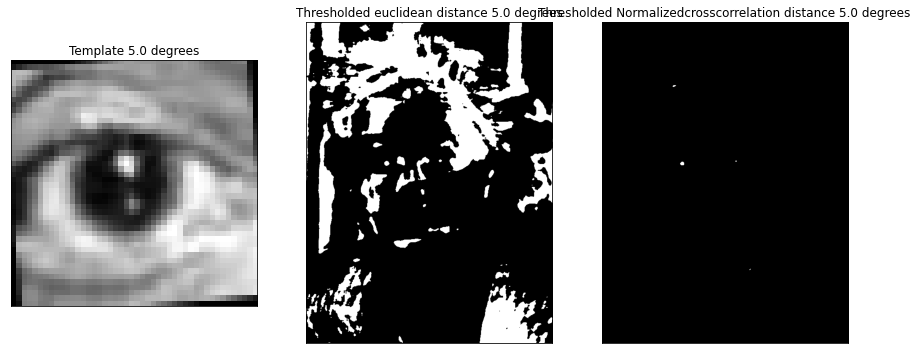

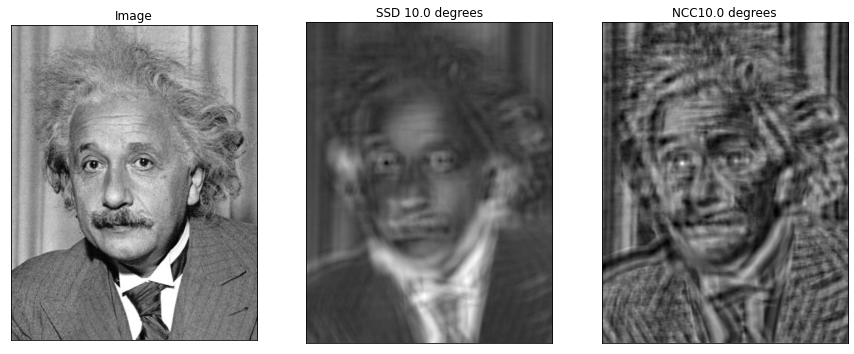

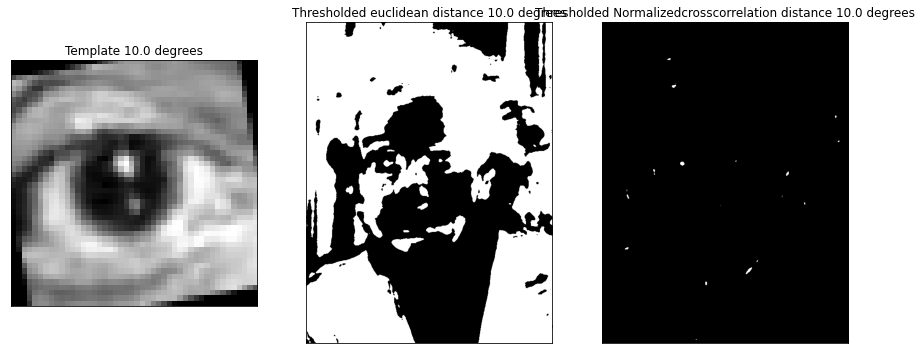

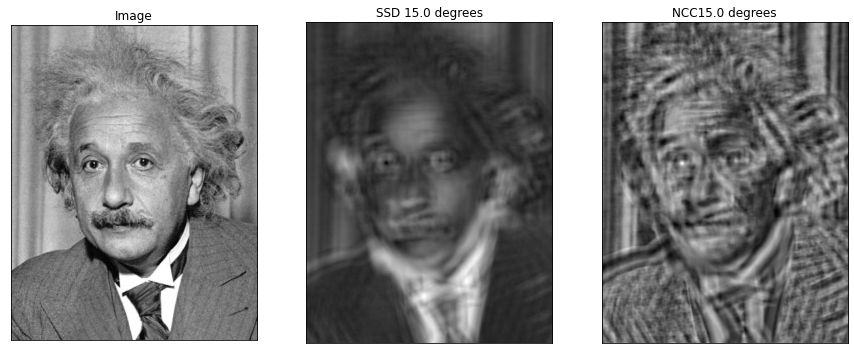

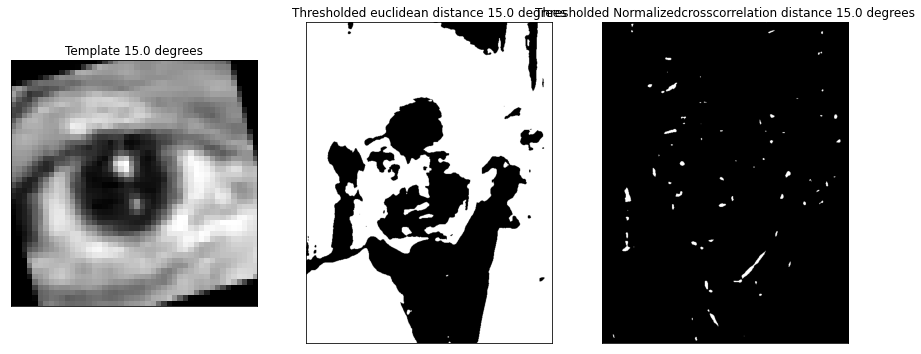

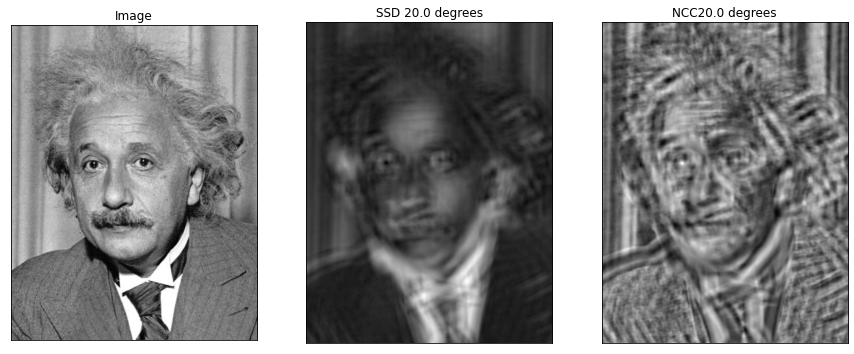

In [104]:
from skimage.transform import rotate

rotations = [2.0,5.0,10.0,15.0,20.00]

for r in rotations:
    reye = rotate(eye, r)
    ed = ssd_fast(einstein, reye)
    ncc = match_template(einstein, reye)
    
    visualize3(einstein, ed, ncc, 'Image', 'SSD '+str(r)+" degrees", 'NCC'+str(r)+" degrees")

    visualize3(reye, mask_ssd(ed, 0.296), mask_ncc(ncc, 0.296), 
               'Template '+str(r)+" degrees", 'Thresholded euclidean distance '+str(r)+" degrees",
               'Thresholded Normalizedcrosscorrelation distance '+str(r)+" degrees")

Comment the template matching process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Is the algorithms affected by contrast changes in the tempate image?
* What parameters it has and which measure for image comparisons works better.

Answers:
* We superpose the eye in all the possible ways above the image and calculate the distance with the pattern and the image (NCC is the normalized cross correlation and ED the euclidean distance). Neverless, analizing the minimums and the maximums of those images respectively gives us the pixel where the pattern coincides the best.
* It affects in how big is the mesure and might generate zones that are more close to match the template.Using an optimum threshold might help us to improve result with contrast problems, but is not a definitive solution.
* The rotation of the image affects greatly the results because we are comparing different pixels (because the image is rotating) every time and gives different results. It gives worst results with bigger rotations as the template is more different to the image.

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.png` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1.** Read the template (`person_template.png`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

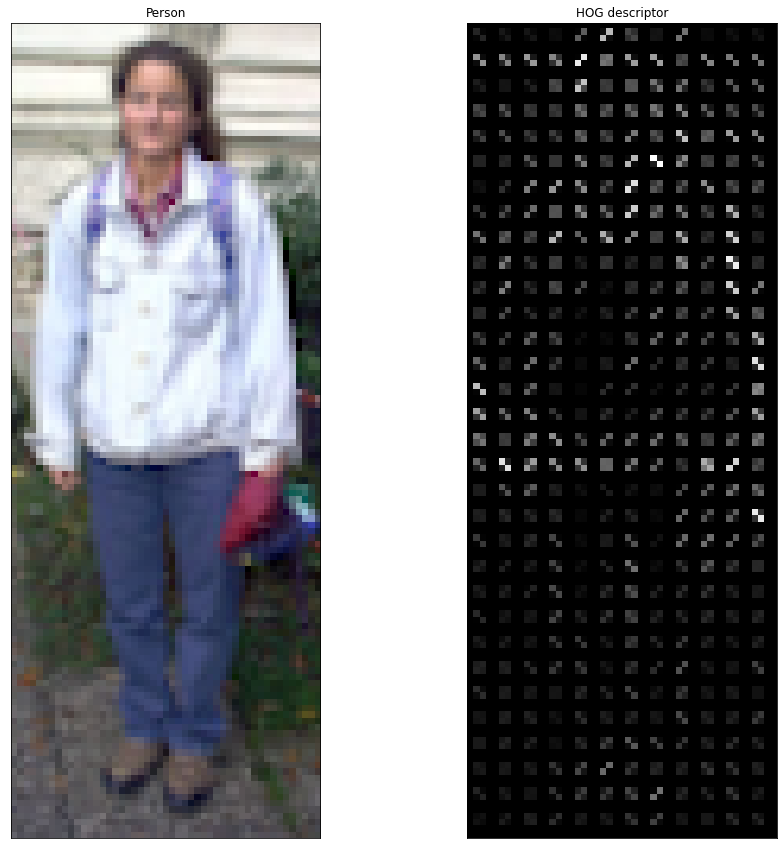

In [105]:
from skimage.feature import hog

PPC = (4,4)
CPB = (2,2)

person = io.imread('images/person_template.bmp')

fd_person, hog_person = hog(person, orientations=8, pixels_per_cell=PPC,
                cells_per_block=CPB, visualize=True)
visualize2(person, hog_person, 'Person', 'HOG descriptor')

**2.2.** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [106]:
def visualize_cars(car,im,im_result,pos_x,pos_y,wcar, hcar):
        fig=plt.figure(figsize=(18,3))
        ax1=plt.subplot(1,3,1)
        ax2=plt.subplot(1,3,2)
        ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)
        ax1.axis('off')
        ax1.set_title('car template')
        ax1.imshow(car, cmap='gray')
        ax2.set_title('Best region match')
        ax2.axis('off')
        ax2.imshow(im, cmap='gray')
        ax3.set_title('Best region in HOG')
        ax3.axis('off')
        ax3.imshow(im_result, cmap='gray')
        rect2 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        rect3 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        ax2.add_patch(rect2)
        ax3.add_patch(rect3)

        plt.show()

In [107]:
def hog_distances(fd_pattern, target, pattern):
    
    hpat, wpat = pattern.shape[0], pattern.shape[1]
    
    distances = np.zeros((target.shape[0], target.shape[1]))
    height,width = target.shape[0], target.shape[1]
    
    for i in range(0, height-hpat, 5):
        for j in range(0, width-wpat, 5):
            
            region = image[i:i+hpat, j:j+wpat]
            fd_region, hog_region = hog(region, orientations=8, pixels_per_cell=PPC, 
                                        cells_per_block=CPB, visualize=True)
            distances[i+round(hpat/2),j+round(wpat/2)]=np.dot(fd_pattern,fd_region)
            
    return distances

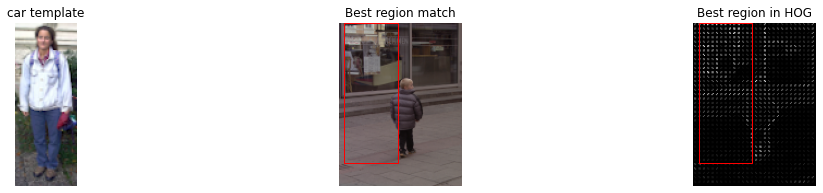

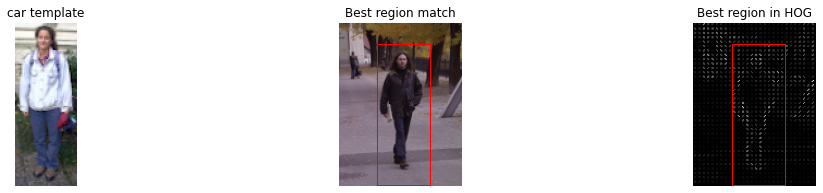

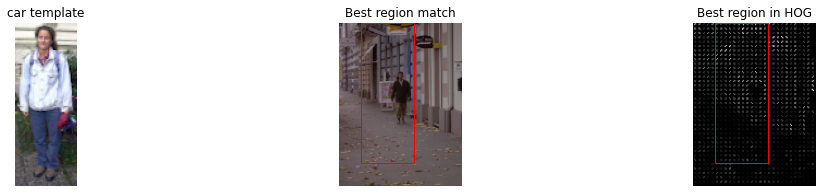

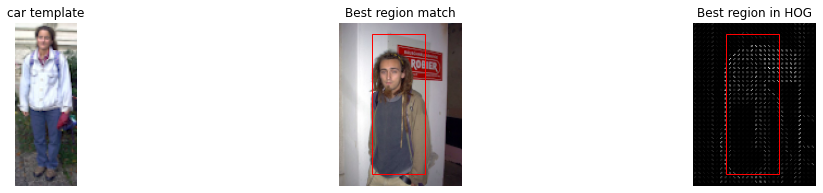

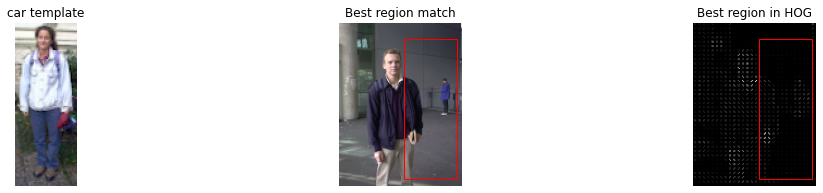

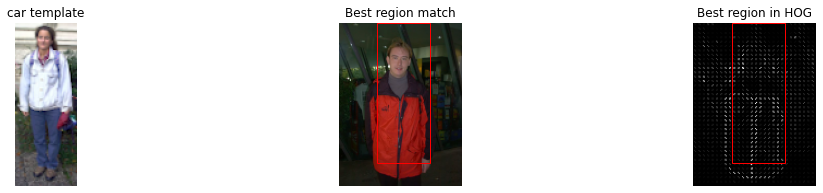

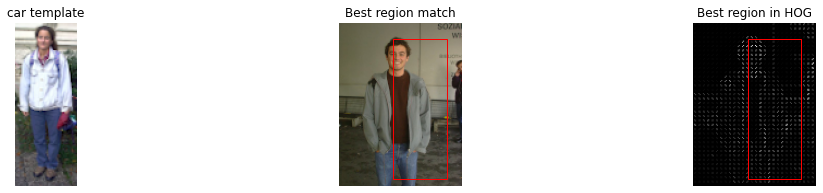

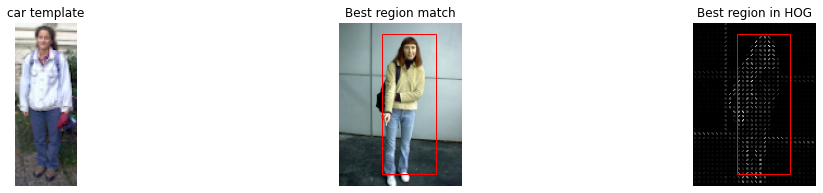

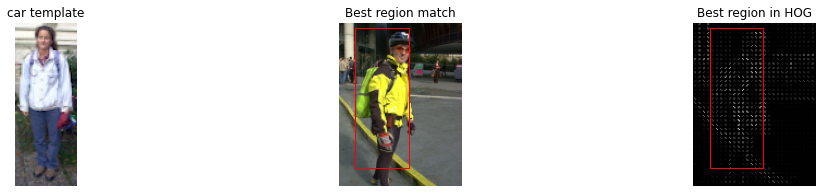

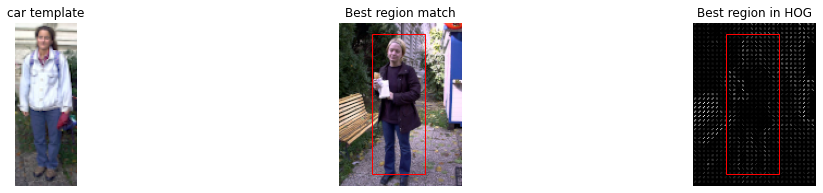

In [108]:
ic = io.ImageCollection('images/TestPersonImages/*.bmp')

for image in ic:
    hog_target = hog(image, orientations=8, pixels_per_cell=PPC,
                    cells_per_block=CPB, visualize=True)

    distances = hog_distances(fd_person, image, person)

    ij = np.unravel_index(np.argmax(distances), distances.shape)
    pos_x, pos_y = ij[::-1]


    visualize_cars(person, image, hog_target[1],  pos_x,  pos_y,  person.shape[1], person.shape[0]) 

What is the dimension of your HOG descriptor? Explain it.

The file descriptor is the histogram of the pixels per cell and cell per block that we have specified when we called the function. That is, we start with this amount of pixels:

In [109]:
print(person.shape)
x=person.shape[0]
y=person.shape[1]

(129, 49, 4)


As we have 4 cells per block (2x2 cpb), and one block has one histogram. we have a 32x1 matrix in each block due to the histogram orientation being 8. The number of blocks we have is the shape of the image knoking we have 4x4 cells- As our shape is not divisible by four, we have to choose the closest 4 divisor:

In [110]:
def nearest_divisor(x,m):
    while(True):
        if x%m==0:
            return x
        else:
            x=x-1

In [111]:
orientation=8
cpb=(2,2)

histogramsPerBlock = cpb[0]*cpb[1]*orientation

print(histogramsPerBlock)

a,b = (nearest_divisor(x,4)/4)-1, (nearest_divisor(y,4)/4)-1

a,b

32


(31.0, 11.0)

At last, with all the data we just have to see if the result is the same, which it is:

In [112]:
a*b*histogramsPerBlock == hog_person[0].shape[0]

False

Count on how many images were the persons detected correctly and discuss the failures.
What do you think can be the reasons for the failures?

We have a sample of 15, and 10 of them are correct matches. One of which we are counting negatives is just detecting a person in the back of the image, not the one in front (that's one of the problems of the HOG descriptor detection), there are just 3 images which the detection is not correct. The fisrt one the algorithm does not manage to detect a toddler, which is reasonable because the size of a kid is not the same as an adult one.
The other 3 are very close up fotos of a person, and it just detects half of it. Probably it is because the people in the images are just to close and none of the hog windows are able to describit properly.

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem.

The optimal avalue of the hog is we have used already, pixels_per_cell=(4,4), cell_per_block=(2,2) and orientation=8.

If you augment the orientation too much (ie 16 or 32) the feature vector size increases too much, and if you reducit, you lose a good amount of accuracy due to loss of information. The same argument goues for pixels per cell. With less pixels per cell, the amount of computations goes up, and with less you oversimplfy (not as a big of a deal than orientation but it still applies).

Comment the object detection process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

The image detection algorithm uses a sliding window (the hog of the pattern) to detect the area in which the hogs descriptors are the most similar. For each window, we compute the hog descripor of the image. Then, we calculate the distances between the hog pattern and the hog image and the maximum of those distances is the window that is the best fit on the image of the template.

### Why do we use a hog descriptor instead of template-based?

The hog descriptor allows us to simplifly the image in a clever way; we just conserve the gradient detection for all the image. This makes the comparison process much faster and clearer for the computer and allows us to implement an algorithm contrast invariant (the gradient direcction is not affected by the magnitude)

The sliding window comparation process is much more faster with hog descriptors due to the simplification of data. Each window comparison is less computationaly heavy and gives us more informations, so we can lower the number of windows we have to use.

And in the hog descriptor we don't need a threshold to check the results; in the template based object we must use the treshold to obtain the results, which means that we have to chose one for each image and it can be unaccurate. The hog descriptor does that part alone, which is fantastic by any means.